# COMPARAISON DES MODELS POUR LA PREDICTION

In [2]:
# librariries 

import pandas as pd 
import numpy as np
import seaborn as sns
import random as rd 
import prince as pr 


import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [3]:
#path="incident_event_log.csv"
#data = pd.read_csv(path)

###########################################################################################
# Importation avec considération des valeurs manquantes
###########################################################################################

In [4]:
#set all '?' entry as null and reread
path="incident_event_log.csv"
missing_values = ['?']

dataset = pd.read_csv(path, na_values = missing_values)
print(dataset.isnull().values.sum())

C:\Users\fouob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


894597


In [5]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"], inplace=True, axis=1)

In [6]:
def print_unique():
    for mstr in dataset:
        print(mstr+":")
        print(dataset[mstr].unique()[0:10])
        print(f"category number = {len(dataset[mstr].unique())}")
print_unique()

number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067']
category number = 24918
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
category number = 9
active:
[ True False]
category number = 2
reassignment_count:
[0 1 2 3 4 5 6 7 8 9]
category number = 28
reopen_count:
[0 1 2 3 4 5 6 7 8]
category number = 9
sys_mod_count:
[0 2 3 4 1 5 6 7 8 9]
category number = 115
made_sla:
[ True False]
category number = 2
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757']
category number = 5245
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  180' 'Opened by  131'
 'Opened by  24' 'Opened by  40' 'Opened by  433' 'Opened by  62'
 'Opened by  501' 'Opened by  301']
category number = 208
opened_at:
['29/2/2016 01:16' '29/2/

In [7]:
#then we covert the time column to datetime type
import datetime
#datetime.datetime.strptime("29/02/2016 15:51",'%d/%m/%Y %H:%M')
date_list=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for mstr in date_list:
    dataset[mstr]=dataset[mstr].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y %H:%M')if type(x) is str else np.NaN)
#unexpectedly, it work

In [8]:
print_unique()

number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067']
category number = 24918
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
category number = 9
active:
[ True False]
category number = 2
reassignment_count:
[0 1 2 3 4 5 6 7 8 9]
category number = 28
reopen_count:
[0 1 2 3 4 5 6 7 8]
category number = 9
sys_mod_count:
[0 2 3 4 1 5 6 7 8 9]
category number = 115
made_sla:
[ True False]
category number = 2
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757']
category number = 5245
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  180' 'Opened by  131'
 'Opened by  24' 'Opened by  40' 'Opened by  433' 'Opened by  62'
 'Opened by  501' 'Opened by  301']
category number = 208
opened_at:
['2016-02-29T01:16:00.000

In [9]:
# calcul du temps de traitement 
dataset['Duration'] = dataset.closed_at  - dataset.sys_created_at 

In [10]:
'''col = ['number', 'closed_at', 'sys_created_at','Duration']
test = dataset[col]
0 in test[~test.Duration.isna()].index'''

"col = ['number', 'closed_at', 'sys_created_at','Duration']\ntest = dataset[col]\n0 in test[~test.Duration.isna()].index"

In [11]:
#Extract day in treatment 
'''dataset['Duration_day'] = ''
for i in range(dataset.shape[0]): 
    if  i in  dataset[~dataset.Duration.isna()].index:
        x = np.timedelta64(dataset.Duration[i], 'ns')
        days = x.astype('timedelta64[D]')
        dataset['Duration_day'][i] = int(days / np.timedelta64(1, 'D'))'''

#sns.boxplot(y = "Duration_day", data = dataset)

"dataset['Duration_day'] = ''\nfor i in range(dataset.shape[0]): \n    if  i in  dataset[~dataset.Duration.isna()].index:\n        x = np.timedelta64(dataset.Duration[i], 'ns')\n        days = x.astype('timedelta64[D]')\n        dataset['Duration_day'][i] = int(days / np.timedelta64(1, 'D'))"

In [12]:
'''def extract_day(df):
    for i in range(dataset.shape[0]):  
        if  i in  df[~df.Duration.isna()].index:
            x = np.timedelta64(df.Duration[i], 'ns')
            days = x.astype('timedelta64[D]')
            df['Duration_day'][i] = int(days / np.timedelta64(1, 'D'))
    return df'''

"def extract_day(df):\n    for i in range(dataset.shape[0]):  \n        if  i in  df[~df.Duration.isna()].index:\n            x = np.timedelta64(df.Duration[i], 'ns')\n            days = x.astype('timedelta64[D]')\n            df['Duration_day'][i] = int(days / np.timedelta64(1, 'D'))\n    return df"

In [13]:
# etract the day in the deltdate
#df = extract_day(dataset)

 ---

# Exploration de données 

In [14]:
#dataset[dataset.number =="INC0000045"]

In [15]:
dataset.number.drop_duplicates()
dataset.number.count()
dataset.groupby(['number']).agg({'incident_state': 'count'}).reset_index().sort_values('incident_state', ascending = False)

,number,incident_state
13295,INC0019396,58
24650,INC0044260,56
3703,INC0005927,46
14219,INC0020718,45
7327,INC0011206,44
...,...,...
9013,INC0013493,2
21413,INC0030079,2
9016,INC0013496,2
3407,INC0005402,2


-le nombre de ligne correspond à l'etat du ticket .


### Faison des tests

In [16]:
#dataset.head()

In [17]:
# test avec les variables pertinentes
#col = ["number", 'incident_state', 'active',
#      'sys_created_at','opened_at','sys_updated_at',
#       'resolved_at','closed_at']
#data_test = dataset[col]
data_test = dataset.drop(['Duration'], axis=1)
#data_test = dataset.copy()
data_test[data_test.sys_created_at.isna()].head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
13,INC0000057,New,True,0,0,0,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
14,INC0000057,New,True,0,0,1,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
15,INC0000057,New,True,0,0,2,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
16,INC0000057,New,True,0,0,3,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
17,INC0000057,New,True,0,0,4,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00


In [18]:
data_test.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


## Imputer des données de temps de fermeture et de resolution

In [19]:
# remplacer les Nat de created par opened 
idx_na = data_test[data_test.sys_created_at.isna()].index

for i  in idx_na:
    #data_test.iloc[i].sys_created_at = data_test.iloc[i].opened_at  
    temp_rep = data_test.iloc[i].opened_at  
    data_test.sys_created_at.replace({pd.NaT: temp_rep}, inplace=True)

In [20]:
# # Remplacer les valeurs manquantes des date de resolution
# par la date de fermeture

idx_nar = data_test[data_test.resolved_at.isna()].index

for i  in idx_nar: 
    temp_res = data_test.iloc[i].closed_at  
    data_test.resolved_at.replace({pd.NaT: temp_res}, inplace=True)

In [21]:
# verification
data_test.sys_created_at.isna().value_counts(), data_test.resolved_at.isna().value_counts()

(False    141712
 Name: sys_created_at, dtype: int64,
 False    141712
 Name: resolved_at, dtype: int64)

In [22]:
# Remplacer les valeurs manquantes des date de creation
# par la date d'ouverture
#temp = pd.to_datetime(data_test[data_test.sys_created_at.isna()].opened_at.to_list())
#temp
#data_test.sys_created_at.replace({pd.NaT: temp}, inplace=True)

# Remplacer les valeurs manquantes des date de resolution
# par la date de fermeture
#temp_res = pd.to_datetime(data_test[data_test.resolved_at.isna()].closed_at.to_list())
#data_test.resolved_at.replace({pd.NaT: temp_res}, inplace=True)

In [33]:
# periode 
data_test.sys_created_at.min(),data_test.sys_created_at.max()

(Timestamp('2016-02-29 01:23:00'), Timestamp('2017-01-27 16:59:00'))

---

## Calcul de la variable cible

In [30]:
len(data_test.number.unique())

24918

In [ ]:
# calcul de la variable cible
data_test['treatment_time'] = data_test.closed_at - data_test.opened_at

#Extract day in treatment 
data_test['treatment_day'] = ' '
for i in range(data_test.shape[0]): 
    x = np.timedelta64(data_test.treatment_time[i], 'ns')
    days = x.astype('timedelta64[D]')
    data_test['treatment_day'][i] = int(days / np.timedelta64(1, 'D'))

In [ ]:
display(
    pd.DataFrame(dataset.describe().Duration),
    pd.DataFrame(data_test.describe().treatment_time)
)

In [ ]:
#idx = rd.sample(range(dataset[dataset.resolved_at.isna()].shape[0]), int(dataset[dataset.resolved_at.isna()].shape[0]* 0.7))

In [ ]:
'''idx_na = data_test[~ data_test.opened_by.isna()].index
vals = []

column_imp = ['caller_id', 'opened_by','sys_created_by',
             'resolved_by','closed_code', 'assigned_to', 
             'assignment_group', 'u_symptom', 'subcategory', 
             'category', 'location']


for i  in idx_na: 
    vals.append(data_test.iloc[i].opened_by)
#unique(vals)
    for val in vals:
        data_test.opened_by.replace({np.nan: val}, inplace=True)'''

In [ ]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x) , 

In [ ]:
#idx = rd.sample(range(dataset[dataset.resolved_at.isna()].shape[0]), int(dataset[dataset.resolved_at.isna()].shape[0]* 0.7))

In [ ]:
# remplacer chacune  des valeurs par leur mediane
import random as rd 
                    
column_imp = ['caller_id', 'opened_by','sys_created_by',
             'resolved_by','closed_code', 'assigned_to', 
             'assignment_group', 'u_symptom', 'subcategory', 
             'category', 'location']

for col in  column_imp:
    
    # je calcul la mediane 
    group_call = data_test.groupby(col).agg({'number':'count'}).\
                    sort_values(by = 'number', ascending = False).\
                        reset_index()  

    # je recupère la médiane 
    med = group_call.describe().loc['50%',"number"]

    liste = group_call[group_call.number<= med][col]
    #values = {'A': liste}
    #print(liste)
    
    for val in liste:
        data_test[col].replace({np.nan: val}, inplace=True)

In [ ]:
data_test[column_imp].head()

### Calcul du temps de traitement pour chacun des tickets
Ici on calcul le temps de traitement pour chacun des tickets

In [ ]:
data_regroup = data_test.groupby(['number']).agg({'sys_created_at': 'min','opened_at': 'max',
                                                  'resolved_at': 'max','closed_at':'max',
                                                  'treatment_time':'max'}).reset_index()
    
#col_trie = ['number','sys_created_at','opened_at','resolved_at','sys_updated_at','closed_at']
#data_regroup = data_test[col_trie].drop_duplicates()

In [ ]:
display(data_regroup.describe(),
        pd.DataFrame(data_test.describe().treatment_time)
       )

 ---
 ---


################################################################################################################################
##                                      ETUDE DE LA VARIABLE PREDITE
###############################################################################################################################

In [33]:
dataset.shape, data_test.shape

((141712, 32), (141712, 33))

In [34]:
graph = data_test.groupby('treatment_time').agg({'number':'count'}).reset_index()

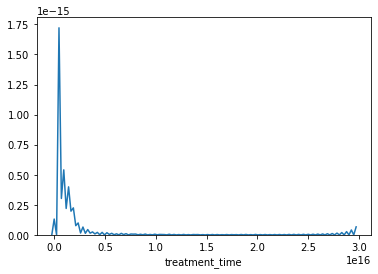

In [35]:
# representation du nombre de ticket par duree de traitement
sns.distplot(data_test.treatment_time,hist = False)

In [36]:
s=data_test.sys_created_at
s2=pd.Series(s.index.values, index=s).resample('w').count()
s3=s2.to_frame()
s3.head()

,0
sys_created_at,
2016-03-06,62390
2016-03-13,10983
2016-03-20,9541
2016-03-27,6980
2016-04-03,7910


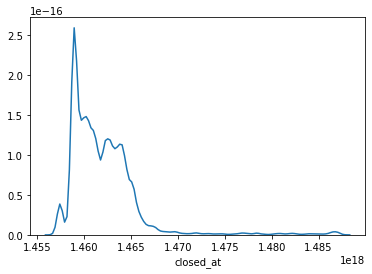

In [37]:
sns.distplot(data_test.closed_at,hist = False)

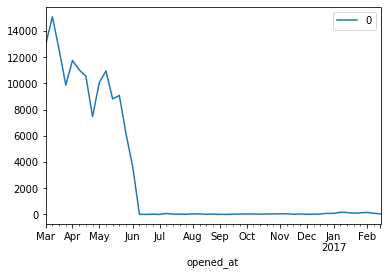

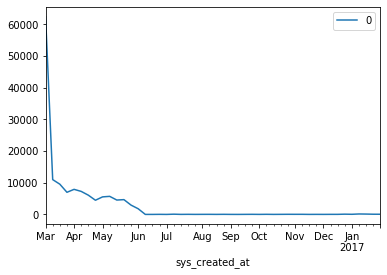

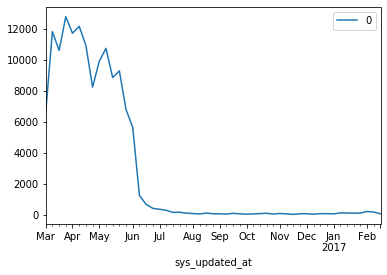

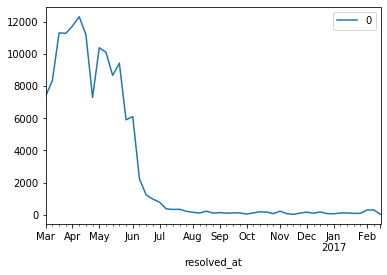

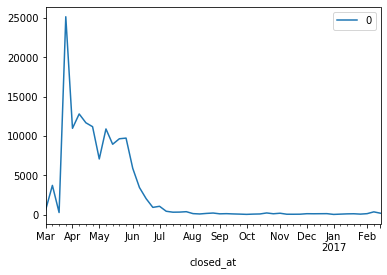

In [38]:

#time series graph after cleaning
for mstr in date_list:
    s=data_test[mstr]
    s2=pd.Series(s.index.values, index=s).resample('w').count()
    s3=s2.to_frame()
    s3.plot()
    plt.savefig(mstr + '.png')  
    plt.show()
   

## Qualitatif simple 

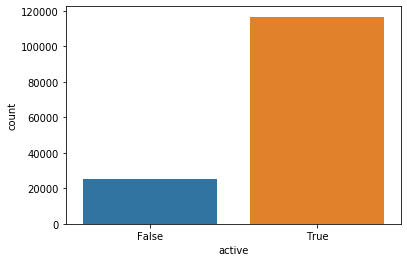

In [39]:
sns.countplot(x = "active", data = data_test)


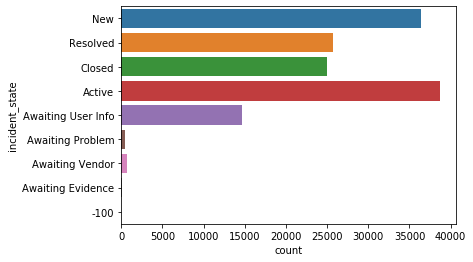

In [40]:
sns.countplot(y = "incident_state", data = data_test)

----
---
---

# Etude correlations

## Quantitatives

C:\Users\fouob\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


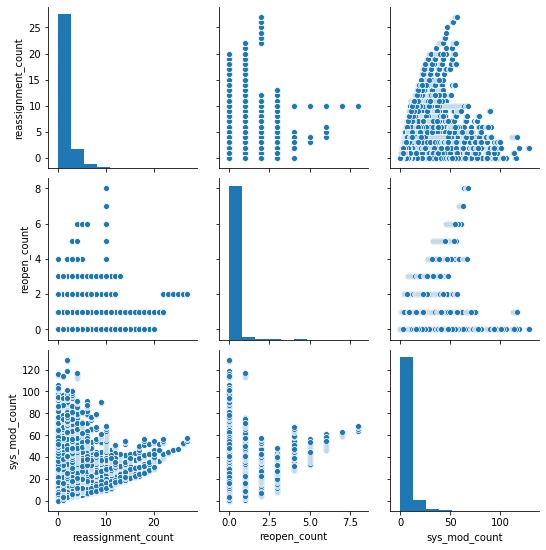

In [41]:
sns_plot = sns.pairplot(data = data_test, vars = ["reassignment_count", "reopen_count", "sys_mod_count"],size=2.5)
sns_plot.savefig("output.png")

## Qualitatives

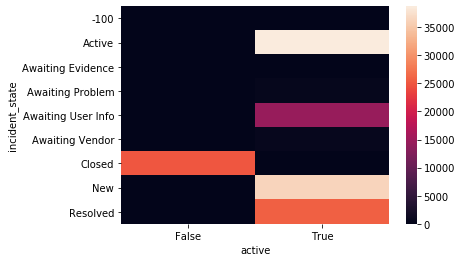

In [42]:
sns.heatmap(pd.crosstab(data_test.incident_state, data_test.active))

C:\Users\fouob\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


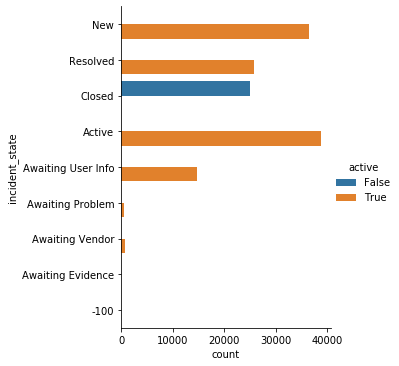

In [43]:
sns.factorplot(y = "incident_state", hue = "active", data = data_test, kind = "count")

C:\Users\fouob\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


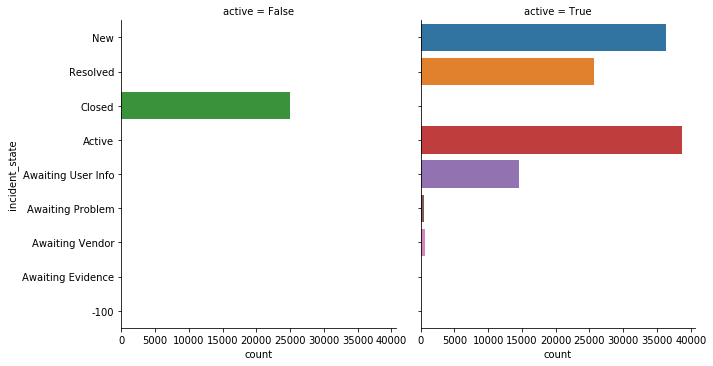

In [44]:
sns_plot = sns.factorplot(y = "incident_state", col = "active", data = data_test, kind = "count")
sns_plot.savefig("biv_inc_act.png")

In [45]:
#sns.factorplot(x = "sys_created_at", y = "number", data = test_group, kind = "box")

# Analyse Multivariée

In [46]:
data_Multi = data_test.drop('treatment_time', axis = 1).head(100)

In [47]:
data_Multi.dtypes
#dataset.dtypes
#data_Multi

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at             datetime64[ns]
sys_updated_by                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
assignment_group                   object
assigned_to                       

In [48]:
# convert date to int 
# in extracting the day of the date
col = ['sys_created_at','opened_at','sys_updated_at',
       'resolved_at','sys_updated_at', 
       'closed_at']

for cl in col:
    data_Multi[cl] = pd.to_datetime(data_Multi[cl]).dt.date

In [49]:
col = ['active', 'made_sla', 'knowledge',
      'u_priority_confirmation']
for cl in col :
    data_Multi[col] = np.multiply(data_Multi[col],1) 

In [50]:
data_Multi.dtypes[:10]

number                object
incident_state        object
active                 int32
reassignment_count     int64
reopen_count           int64
sys_mod_count          int64
made_sla               int32
caller_id             object
opened_by             object
opened_at             object
dtype: object

In [51]:
data_test.isna().any()[:10],data_Multi.isnull().any()[:10]

(number                False
 incident_state        False
 active                False
 reassignment_count    False
 reopen_count          False
 sys_mod_count         False
 made_sla              False
 caller_id             False
 opened_by             False
 opened_at             False
 dtype: bool,
 number                False
 incident_state        False
 active                False
 reassignment_count    False
 reopen_count          False
 sys_mod_count         False
 made_sla              False
 caller_id             False
 opened_by             False
 opened_at             False
 dtype: bool)

In [52]:
data_Multi[column_imp].dtypes

caller_id           object
opened_by           object
sys_created_by      object
resolved_by         object
closed_code         object
assigned_to         object
assignment_group    object
u_symptom           object
subcategory         object
category            object
location            object
dtype: object

In [53]:
len(data_Multi.astype('object').columns), len(data_Multi.columns)

(32, 32)

In [54]:
data_Multi_mca = data_Multi.astype('object')

In [55]:
mca = pr.MCA(
     n_components=5,
     n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
 )
mca = mca.fit(data_Multi_mca)

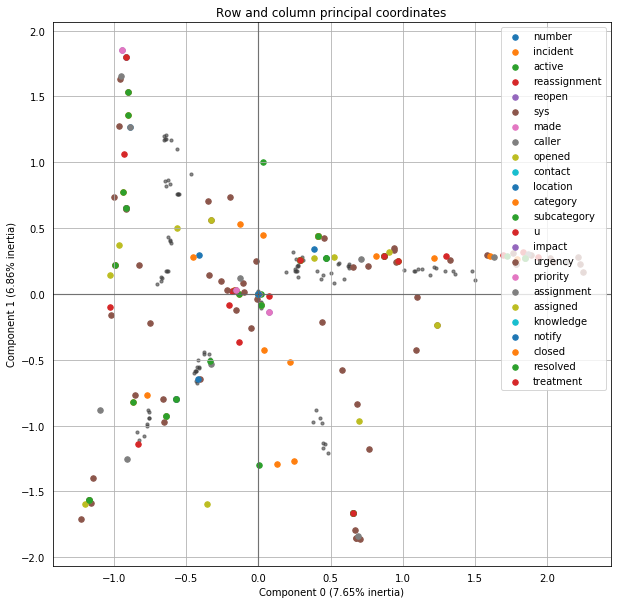

In [56]:
>>> ax = mca.plot_coordinates(
...     X= data_Multi_mca ,
...     ax=None,
...     figsize=(10, 10),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=False,
        #ellipse_outline=False,
...    # ellipse_fill=True,
...     #legend_n_cols=5
... )
>>> ax.get_figure().savefig('mca_coordinates.png')

In [57]:
 mca.eigenvalues_

[0.4445777879300324,
 0.3989802675667108,
 0.3761275802473513,
 0.3450824538037533,
 0.33889784333546785]

In [58]:
 mca.total_inertia_

5.8125

In [59]:
 mca.explained_inertia_ 

[0.07648650114925289,
 0.06864176646309003,
 0.06471012133287765,
 0.05936902431032315,
 0.058305005305026726]

In [60]:
X= data_Multi_mca
mca.row_coordinates(X)

,0,1,2,3,4
0,-0.604192,0.389823,-0.076139,0.035991,-0.012812
1,-0.610873,0.405509,-0.042202,-0.003230,-0.048663
2,-0.615144,0.410991,-0.025245,-0.010493,-0.068144
3,-0.630577,0.434470,-0.025839,-0.002859,-0.014244
4,-0.763368,-0.880537,-0.564127,0.298173,-0.645693
...,...,...,...,...,...
95,-0.334176,-0.491253,-0.077640,0.145484,-0.121211
96,-0.412602,-0.559726,-0.094377,0.167651,-0.156473
97,-0.413352,-0.550904,-0.088737,0.121774,-0.140074
98,-0.417706,-0.502035,-0.089147,0.138735,-0.091510


In [61]:
mca.column_coordinates(X)

,0,1,2,3,4
number_INC0000045,-0.922656,0.649408,-0.069064,0.008260,-0.061781
number_INC0000047,-1.175544,-1.561820,-0.838068,0.476796,-1.194208
number_INC0000057,-0.992181,0.216224,-0.420881,0.249847,0.625479
number_INC0000060,0.415512,0.441274,-1.047602,-0.862744,1.492357
number_INC0000062,-0.916142,1.803092,0.922761,-0.483602,-0.134552
...,...,...,...,...,...
treatment_day_6,-0.832984,-1.140265,-0.522486,0.123837,-0.508678
treatment_day_7,0.965413,0.250063,-0.768814,-0.374467,0.105431
treatment_day_8,0.873208,0.291006,1.471967,1.832758,-1.422732
treatment_day_24,0.653039,-1.666450,2.193249,-1.029183,1.291704


In [62]:
data_test['treatment_day'].isna().value_counts()

False    141712
Name: treatment_day, dtype: int64

In [63]:
data_test.treatment_day.astype('int').isna().value_counts()

False    141712
Name: treatment_day, dtype: int64

## Anova 

In [64]:
from scipy.stats import f_oneway

In [65]:
# convert to int
data_test['treatment_day'] = data_test.treatment_day.astype('int')

# load data for anova 
drop_column=["opened_at","sys_created_at","sys_updated_at",
             "resolved_at","closed_at","number",
             "treatment_time"]
data_aov=data_test.drop(drop_column, axis=1)

In [66]:
# seletctionner les colonnes boleean 
col_bool = data_aov.select_dtypes(include=[bool]).columns
data_aov[col_bool].head()

# selectionner un type de variable precis
for cl in col_bool: 
    data_aov[cl] = data_aov[cl].astype(int)

In [67]:
 data_aov.select_dtypes(include=[object]).head()

,incident_state,caller_id,opened_by,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,notify,closed_code,resolved_by
0,New,Caller 2403,Opened by 8,Created by 6,Updated by 21,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
1,Resolved,Caller 2403,Opened by 8,Created by 6,Updated by 642,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
2,Resolved,Caller 2403,Opened by 8,Created by 6,Updated by 804,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
3,Closed,Caller 2403,Opened by 8,Created by 6,Updated by 908,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
4,New,Caller 2403,Opened by 397,Created by 171,Updated by 746,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,Do Not Notify,code 5,Resolved by 81


In [68]:
#data_aov.select_dtypes(include=[object]).columns.to_list()

In [69]:
#col_changed = ['incident_state', 'contact_type', 'impact', 'urgency','priority', 'notify']

col_changed = data_aov.select_dtypes(include=[object]).columns.to_list()
data_aov[col_changed].head()

,incident_state,caller_id,opened_by,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,notify,closed_code,resolved_by
0,New,Caller 2403,Opened by 8,Created by 6,Updated by 21,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
1,Resolved,Caller 2403,Opened by 8,Created by 6,Updated by 642,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
2,Resolved,Caller 2403,Opened by 8,Created by 6,Updated by 804,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
3,Closed,Caller 2403,Opened by 8,Created by 6,Updated by 908,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 45,Do Not Notify,code 5,Resolved by 149
4,New,Caller 2403,Opened by 397,Created by 171,Updated by 746,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,Do Not Notify,code 5,Resolved by 81


In [70]:
#data_aov[col_changed].contact_type.unique()

In [71]:
# select all categorial columns and transform to list
#col_changed = col_changed = data_aov.select_dtypes(include=[object]).columns.to_list()
#data_aov[col_changed].head()

def to_change_num(df,col_changed):
    '''
    Transform all categorial column to numerical column 
    df is a Dataframe with catégorial column
    col_changed is a list of the categorial column choosed
    '''
    df = df[col_changed]
    Y_list = []
    dict_val = {}

    for cl in col_changed:
        #print(df[cl].head())

        for i in range(len(df[cl].unique())):
            X_list = str(df[cl].unique()[i]) 
            Y_list = (i + 1)

            dict_val[X_list] = Y_list

            # remplacer par des valeurs 
            df = df.applymap(lambda s: dict_val.get(s) if s in dict_val else s)

    # on remet tout dans la table de base         
    #df[col_changed] = df
    return df

In [72]:
# Transform all categorial column to numerical column 
# en prenant les variables ayant moins de 10 modalités car cela prend trop de temps de calcul 

col_changed = ['incident_state', 'contact_type', 'impact', 'urgency','priority', 'notify']
data_aov_transform  = data_aov.copy()
data_aov_transform[col_changed] = to_change_num (data_aov,col_changed)
#data_aov_transform.head()

In [73]:
# verifier si les 2 tables sont identiques 
#data_aov.isnull().any(), data_aov_transform.isnull().any()

In [74]:
# reverification du type des variables
#data_aov_num.dtypes,

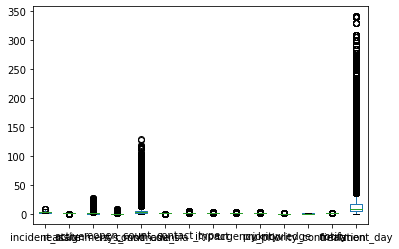

In [75]:
data_aov_num = data_aov_transform.select_dtypes(exclude=[object])

# I am using Python 3
# load packages
import pandas as pd
# load data file
d = data_aov_num
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=data_aov_num.columns.to_list(), grid=False)

In [76]:
data_aov_num.corr()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,notify,treatment_day
incident_state,1.000000,-0.060640,0.177801,0.067919,0.259269,-0.035976,0.001677,-0.000349,0.006396,-0.003597,0.059506,-0.109731,-0.015595,0.148222
active,-0.060640,1.000000,0.043323,0.019083,-0.097202,0.565501,-0.001609,0.002890,0.002399,0.013176,0.043711,-0.488946,-0.009601,0.064723
reassignment_count,0.177801,0.043323,1.000000,0.160193,0.527919,-0.089037,-0.014787,0.005610,0.002283,0.012554,0.082968,-0.000441,-0.005955,0.155896
reopen_count,0.067919,0.019083,0.160193,1.000000,0.247292,-0.015880,-0.005692,-0.014353,-0.016827,-0.018228,0.006847,0.131248,-0.003065,0.050219
sys_mod_count,0.259269,-0.097202,0.527919,0.247292,1.000000,-0.241942,0.007480,0.020200,0.019185,0.032728,0.065103,0.185867,-0.006142,0.591858
made_sla,-0.035976,0.565501,-0.089037,-0.015880,-0.241942,1.000000,-0.004334,0.007710,-0.001275,-0.016379,-0.073070,-0.232037,-0.024959,-0.090060
contact_type,0.001677,-0.001609,-0.014787,-0.005692,0.007480,-0.004334,1.000000,0.002909,-0.011652,0.004653,-0.038872,0.012133,0.158214,0.013092
impact,-0.000349,0.002890,0.005610,-0.014353,0.020200,0.007710,0.002909,1.000000,0.848967,0.848857,0.090566,-0.003410,-0.006440,0.021867
urgency,0.006396,0.002399,0.002283,-0.016827,0.019185,-0.001275,-0.011652,0.848967,1.000000,0.842163,0.084103,-0.000035,-0.006525,0.019422
priority,-0.003597,0.013176,0.012554,-0.018228,0.032728,-0.016379,0.004653,0.848857,0.842163,1.000000,0.068976,0.020723,-0.007112,0.012748


In [77]:
# load packages
import scipy.stats as stats


# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['incident_state'],d['active'], d['reassignment_count'], d['reopen_count'],
                                d['sys_mod_count'], d['made_sla'],d['contact_type'], d['knowledge'],
                               d['impact'],d['urgency'],d['priority'],d['notify'],
                                d['u_priority_confirmation'],d['treatment_day'], )
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

46303.10634139935 0.0


In [78]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
len(d.columns)

14

In [80]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(),
                 id_vars=['index'],
                 value_vars=d.columns)

# replace column names
d_melt.columns = [ 'index', 'treatments', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3.441859e+07,13.0,46303.106342,0.0
Residual,1.134413e+08,1983954.0,NaN,NaN


In [81]:
'''from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, anova_table)  # where df is your data frame

plt.savefig('mytable.png')'''

"from pandas.plotting import table # EDIT: see deprecation warnings below\n\nax = plt.subplot(111, frame_on=False) # no visible frame\nax.xaxis.set_visible(False)  # hide the x axis\nax.yaxis.set_visible(False)  # hide the y axis\n\ntable(ax, anova_table)  # where df is your data frame\n\nplt.savefig('mytable.png')"

- The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.
- D’après l’analyse des ANOVA, nous savons que les différences de traitement sont statistiquement significatives, mais les ANOVA ne précisent pas quels traitements sont significativement différents les uns des autres. Pour connaître les paires de traitements différents significatifs, nous effectuerons une comparaison par paires multiples (comparaison post-hoc) à l’aide du test HSD de Tukey.

In [82]:
# load packages
from pingouin import pairwise_tukey
# perform multiple pairwise comparison (Tukey HSD)
# for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
m_comp = pairwise_tukey(data=d_melt, dv='value', between='treatments')
pd.DataFrame(m_comp)
#print(m_comp)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,contact_type,0.823685,1.016463,-0.192778,0.028407,-6.786200,0.001000,-0.025494
1,active,impact,0.823685,1.079478,-0.255793,0.028407,-9.004465,0.001000,-0.033827
2,active,incident_state,0.823685,2.815584,-1.991899,0.028407,-70.119017,0.001000,-0.263419
3,active,knowledge,0.823685,0.178976,0.644709,0.028407,22.695106,0.001000,0.085259
4,active,made_sla,0.823685,0.934974,-0.111289,0.028407,-3.917609,0.672746,-0.014717
...,...,...,...,...,...,...,...,...,...
86,sys_mod_count,u_priority_confirmation,5.080946,0.289122,4.791824,0.028407,168.682247,0.001000,0.633694
87,sys_mod_count,urgency,5.080946,1.079146,4.001799,0.028407,140.871718,0.001000,0.529218
88,treatment_day,u_priority_confirmation,16.724314,0.289122,16.435193,0.028407,578.553186,0.001000,2.173471
89,treatment_day,urgency,16.724314,1.079146,15.645168,0.028407,550.742658,0.001000,2.068994


In [83]:
data_Multi.treatment_day.astype('int32')

0      5
1      5
2      5
3      5
4      6
      ..
95     6
96     6
97     6
98     6
99    47
Name: treatment_day, Length: 100, dtype: int32

In [84]:
import pingouin as pg

column=['active','reassignment_count','reopen_count','sys_mod_count',
                  'made_sla','knowledge','u_priority_confirmation']

# Read an example dataset
data_aov_transform['treatment_day'] = data_Multi.treatment_day.astype('int32')

# Run the ANOVA
for i in range(len(column)):
    aov = pg.anova(data=data_aov_transform, dv='treatment_day', between= column[i], detailed=True)
    print(pd.DataFrame(aov))

   Source           SS  DF         MS         F     p-unc       np2
0  active     4.382104   1   4.382104  0.109247  0.741709  0.001114
1  Within  3930.977896  98  40.112019       NaN       NaN       NaN
               Source           SS  DF         MS         F     p-unc  \
0  reassignment_count    14.257959   6   2.376327  0.056361  0.999249   
1              Within  3921.102041  93  42.162388       NaN       NaN   

        np2  
0  0.003623  
1       NaN  
         Source       SS  DF         MS  np2
0  reopen_count     0.00   0        NaN  0.0
1        Within  3935.36  99  39.751111  NaN
          Source          SS  DF         MS         F     p-unc       np2
0  sys_mod_count   256.02862  13  19.694509  0.460336  0.940593  0.065059
1         Within  3679.33138  86  42.782923       NaN       NaN       NaN
     Source           SS  DF         MS        F     p-unc       np2
0  made_sla    84.115102   1  84.115102  2.14042  0.146663  0.021374
1    Within  3851.244898  98  39.298417

C:\Users\fouob\anaconda3\lib\site-packages\pingouin\parametric.py:962: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
C:\Users\fouob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\fouob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\fouob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\fouob\anaconda3\lib\site-packages\pingouin\parametric.py:962: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
C:\Users\fouob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\fou

##############################################################################################################################
# Partie 2 : LES METHODES DE REGRESSION
List the learned predicted meachine learning model:

* Decision Tree/Random Forest
* KNN
* Bayes' Classifier
* Linear/Logistic Regression with Gradient Descent
* Item-CF
###############################################################################################################################

## Linear Regression 

In [324]:

#Well, the jupyter said the memory is not enough(because there are too much category)
#And even memory space is enough, it is bad to fit a regression model with some many columns
#so, I choose to drop the categorical features with categories more than cate=10 
cate=10
dataset_linear_regression=data_aov_transform.copy()
catColumns = dataset_linear_regression.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()
for col in catColumns:
    n = len(dataset_linear_regression[col].unique())
    if (n > 2):
        if(n < cate):
            X = pd.get_dummies(dataset_linear_regression[col])       
            #X = X.drop(X.columns[0], axis=1)
            dataset_linear_regression[col+" - "+X.columns] = X
        dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        le.fit(dataset_linear_regression[col])
        dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])

In [484]:
dataset_linear_regression.head(10)

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,notify,solve_time
0,1,1,0,0,0,1,1,1,1,1,1,0,1,5 days 10:44:00
1,2,1,0,0,2,1,1,1,1,1,1,0,1,5 days 10:44:00
2,2,1,0,0,3,1,1,1,1,1,1,0,1,5 days 10:44:00
3,3,0,0,0,4,1,1,1,1,1,1,0,1,5 days 10:44:00
4,1,1,0,0,0,1,1,1,1,1,1,0,1,6 days 05:20:00
5,4,1,1,0,1,1,1,1,1,1,1,0,1,6 days 05:20:00
6,4,1,1,0,2,1,1,1,1,1,1,0,1,6 days 05:20:00
7,4,1,1,0,3,1,1,1,1,1,1,0,1,6 days 05:20:00
8,4,1,1,0,4,1,1,1,1,1,1,0,1,6 days 05:20:00
9,4,1,1,0,5,1,1,1,1,1,1,0,1,6 days 05:20:00


In [326]:
import sklearn.metrics as metrics
#from sklearn.metrics import mean_absolute_percentage_error

def regression_results(y_true, y_pred,r=None):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    median_absolute_percent_error = mean_absolute_percentage_error(y_true, y_pred)
    
    
    r2=metrics.r2_score(y_true, y_pred)
    if r=='MSE':
        return round(mse,4)
    else:
        print('explained_variance: ', round(explained_variance,4))    
        #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
        print('r2: ', round(r2,4))
        print('MAE: ', round(mean_absolute_error,4))
        print('MAPE: ', round(median_absolute_percent_error,4))
        print('MSE: ', round(mse,4))
        print('RMSE: ', round(np.sqrt(mse),4))

In [327]:
# Add solve_time column 
dataset_linear_regression = dataset_linear_regression.drop('treatment_day', axis=1)
dataset_linear_regression ['solve_time'] = data_test.treatment_time
dataset_linear_regression.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,notify,solve_time
0,1,1,0,0,0,1,1,1,1,1,1,0,1,5 days 10:44:00
1,2,1,0,0,2,1,1,1,1,1,1,0,1,5 days 10:44:00
2,2,1,0,0,3,1,1,1,1,1,1,0,1,5 days 10:44:00
3,3,0,0,0,4,1,1,1,1,1,1,0,1,5 days 10:44:00
4,1,1,0,0,0,1,1,1,1,1,1,0,1,6 days 05:20:00


In [328]:
cond1=(dataset_linear_regression.solve_time/np.timedelta64(1, 'h')>=0) & \
      (dataset_linear_regression.solve_time/np.timedelta64(1, 'h')<125.11)

cond2=(dataset_linear_regression.solve_time/np.timedelta64(1, 'h')>=125.11) & \
      (dataset_linear_regression.solve_time/np.timedelta64(1, 'h')<225)

cond3=(dataset_linear_regression.solve_time/np.timedelta64(1, 'h')>=225) & \
      (dataset_linear_regression.solve_time/np.timedelta64(1, 'h')<417)

cond4=(dataset_linear_regression.solve_time/np.timedelta64(1, 'h')>=417) & \
      (dataset_linear_regression.solve_time/np.timedelta64(1, 'h')<8190)

cond5=(dataset_linear_regression.solve_time/np.timedelta64(1, 'h')>=8190) 

dico = {'cond1' : [dataset_linear_regression[cond1].count()[0]],
       'cond2' : [dataset_linear_regression[cond2].count()[0]],
       'cond3' : [dataset_linear_regression[cond3].count()[0]],
       'cond4' : [dataset_linear_regression[cond4].count()[0]],
       'cond5' : [dataset_linear_regression[cond5].count()[0]]}

data_count = pd.DataFrame(dico)
data_count['total'] = data_count.cond1 + data_count.cond2 +data_count.cond3 +data_count.cond4 + data_count.cond5
data_count = data_count.rename(index={0: "condition"})
data_count_transf = data_count[['cond1','cond2','cond3','cond4','cond5']].T

#data_count_transf["Total"] = dataset_linear_regression.shape[0]
data_count_transf["Freq"] = round((data_count_transf.condition / dataset_linear_regression.shape[0])*100)
data_count_transf

,condition,Freq
cond1,35375,25.0
cond2,35487,25.0
cond3,35126,25.0
cond4,35719,25.0
cond5,5,0.0


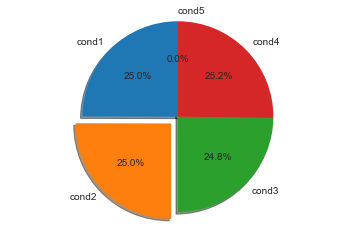

In [329]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cond1', 'cond2', 'cond3', 'cond4','cond5'
sizes = data_count_transf.condition.to_list()
explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_time.png')  
plt.show()

In [341]:
x_linear_regression.shape, x_test.shape

((141712, 13), (28343, 13))

In [330]:
#dataset_linear_regression.columns

In [331]:
#Linear regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_linear_regression = dataset_linear_regression.drop('solve_time', axis=1)
y =( dataset_linear_regression['solve_time']/np.timedelta64(1, 'h')).astype('int')

# split to 2 Datatest 
x_train, x_test, y_train, y_test = train_test_split(x_linear_regression, y, test_size=0.20)

# define the linear model 
linreg = linear_model.LinearRegression()
reg=linreg.fit(x_train,y_train)
regression_results(y_test, reg.predict(x_test))
#comment: the LinearRegression does not have significant parameters to adjust

explained_variance:  0.4278
r2:  0.4278
MAE:  218.5788
MAPE:  inf
MSE:  234525.4491
RMSE:  484.2783


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [95]:
'''dataset_linear_regression.solve_time.describe()
id_reg = dataset_linear_regression[dataset_linear_regression.solve_time>= 8190].index
data_test.iloc[id_reg]'''

'dataset_linear_regression.solve_time.describe()\nid_reg = dataset_linear_regression[dataset_linear_regression.solve_time>= 8190].index\ndata_test.iloc[id_reg]'

In [96]:
# verification du temps
#pd.DataFrame({'tab_base':data_test.treatment_time,'reg':dataset_linear_regression.solve_time})

In [97]:
#reg.coef_

In [98]:
#reg.score(x_test, y_test)

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#x_linear_regression = dataset_linear_regression.drop('solve_time', axis=1)
#y = dataset_linear_regression['solve_time']/np.timedelta64(1, 'h')

X = x_linear_regression
y = y


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             solve_time   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     8529.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:42:22   Log-Likelihood:            -1.0784e+06
No. Observations:              141712   AIC:                         2.157e+06
Df Residuals:                  141698   BIC:                         2.157e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [342]:
dict_pred = {'durée_actuelle':y_test,
             'durée_predit':reg.predict(x_test) }
df = pd.DataFrame(dict_pred)
df.head()

,durée_actuelle,durée_predit
55775,122,236.886082
86929,120,254.894180
137214,120,262.799158
43033,811,927.159481
106178,149,262.799158


In [101]:
data_test.loc[df.index].head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,treatment_time,treatment_day
49773,INC0011361,New,True,1,0,3,True,Caller 2928,Opened by 131,2016-03-25 07:28:00,...,Resolver 120,False,False,Do Not Notify,code 6,Resolved by 108,2016-04-06 14:11:00,2016-04-11 14:59:00,17 days 07:31:00,17
85933,INC0020582,Active,True,2,0,4,True,Caller 4514,Opened by 444,2016-04-18 16:23:00,...,Resolver 17,False,False,Do Not Notify,code 6,Resolved by 15,2016-04-19 14:49:00,2016-04-24 15:07:00,5 days 22:44:00,5
102053,INC0024735,New,True,0,0,0,True,Caller 3062,Opened by 17,2016-05-02 09:30:00,...,Resolver 45,False,False,Do Not Notify,code 6,Resolved by 180,2016-05-03 11:30:00,2016-05-08 12:07:00,6 days 02:37:00,6
35794,INC0007978,New,True,0,0,0,True,Caller 2079,Opened by 108,2016-03-16 17:12:00,...,Resolver 151,False,False,Do Not Notify,code 9,Resolved by 135,2016-04-19 10:23:00,2016-04-24 11:07:00,38 days 17:55:00,38
93304,INC0022509,Closed,False,0,0,9,False,Caller 1163,Opened by 17,2016-04-25 16:59:00,...,Resolver 200,False,True,Do Not Notify,code 6,Resolved by 182,2016-05-12 11:21:00,2016-05-17 12:07:00,21 days 19:08:00,21


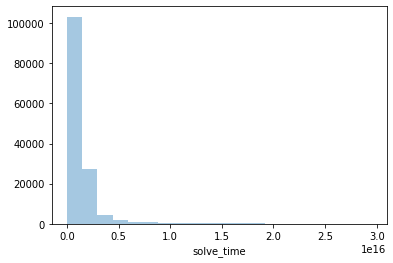

In [102]:
x = dataset_linear_regression.solve_time
sns.distplot(x, bins=20, kde=False, );

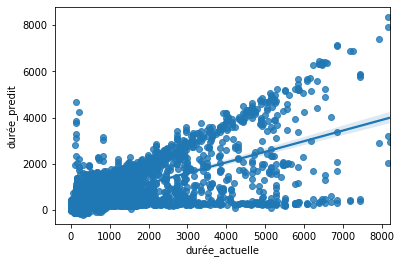

In [103]:
# prediction resul vs test data 
sns_hist = sns.regplot(x="durée_actuelle", y="durée_predit", data=df)
fig = sns_hist.get_figure()
fig.savefig('hist.png')

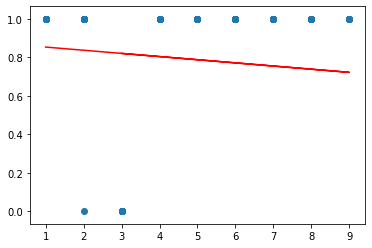

In [104]:
data = dataset_linear_regression  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [105]:
#SGDRegressor
harvest=[]
i=-1
PENALTY=['none', 'l2', 'l1', 'elasticnet']
LOSS=['squared_loss', 'huber', 'epsilon_insensitive',  'squared_epsilon_insensitive']
for penalty in PENALTY:
    harvest.append([])
    i+=1
    for loss in LOSS:
        sgdreg=linear_model.SGDRegressor(penalty=penalty,loss=loss)
        reg2=sgdreg.fit(x_train,y_train)
        harvest[i].append(regression_results(y_test, reg2.predict(x_test),r="MSE"))

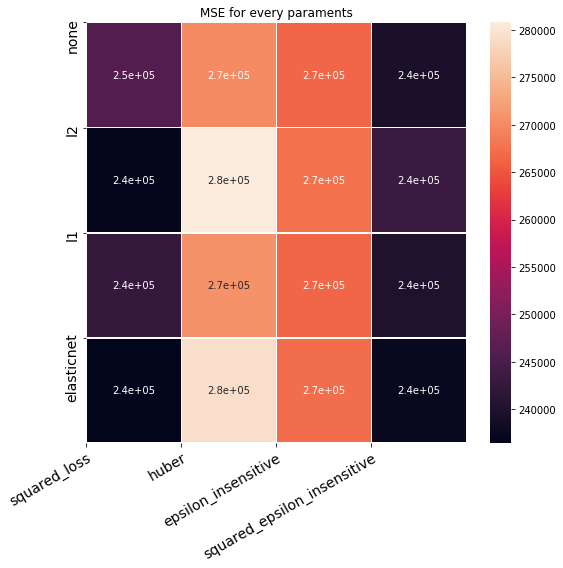

In [106]:
harvest_np = np.array(harvest)
fig, ax = plt.subplots(figsize=(8,8))   

ax=sns.heatmap(harvest_np, annot=True,  linewidths=.5)
# We want to show all ticks...
ax.set_xticks(np.arange(len(LOSS)))
ax.set_yticks(np.arange(len(PENALTY)))
# ... and label them with the respective list entries
ax.set_xticklabels(LOSS, fontsize=14)
ax.set_yticklabels(PENALTY, fontsize=14)

#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

ax.set_title("MSE for every paraments")
fig.tight_layout()
plt.savefig('heatmap.png')  
plt.show()

## 2eme mehode knn avec l'ensemble des variables 

In [451]:
dataset_lr = data_test.copy()
x_lr = dataset_lr.drop(['treatment_time','treatment_day'], axis=1)

#label encoder
x_lr = x_lr.apply(preprocessing.LabelEncoder().fit_transform)
y_lr = dataset_lr['treatment_time']/np.timedelta64(1, 'h')

# split sata 
xl_train2, xl_test2, yl_train2, yl_test2 = train_test_split(x_lr, y_lr, test_size=0.2,random_state=seed1)

In [452]:
linear_regressor = LinearRegression()  # create object for the class
reg3 = linear_regressor.fit(x_lr, y_lr)  # perform linear regression

regression_results(yl_test2, reg3.predict(xl_test2))

explained_variance:  0.8116
r2:  0.8116
MAE:  133.5945
MAPE:  inf
MSE:  79509.7319
RMSE:  281.9747


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [453]:
rnn_pre = reg3.predict(xl_test2)

dict_pred = {'durée_actuelle':yl_test2,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt.head()


df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,410.403756,409.821089,0.582666
std,649.652012,584.159581,65.492431
min,0.000000,-270.829416,270.829416
25%,125.133333,104.832350,20.300983
50%,226.166667,254.268500,28.101833
75%,421.858333,447.619988,25.761655
max,8190.616667,6556.536582,1634.080084


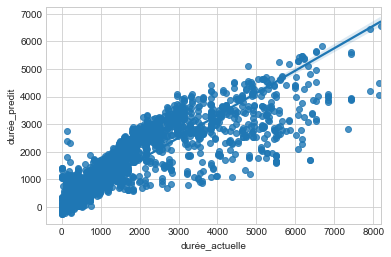

In [454]:
# prediction resul vs test data 
rnn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = rnn.get_figure()
fig.savefig('Lr_pred2.png')

Après quelques évaluations dans parament, j’ai trouvé que l’hyperparament compose "penalty='l2',loss='squared_loss'" a la meilleure performance (et c’est le paramètre par défaut).
Mais dans l’ensemble, l’impact n’est pas si important, en général.
Et la performance finale est également similaire avec la régression linéaire normale
Je considère que peut-être parce que tous les modèles linéaires convergeraient finalement vers une situation stable similaire
En outre, je considère peut-être que les fonctionnalités abandonnées contiennent encore beaucoup d’informations et nous devons trouver un moyen d’utiliser ces données

---
---
---

###############################################################################################################################
# KNN
################################################################################################################################

In [107]:
# Add solve_time column 
#dataset_linear_regression = dataset_linear_regression.drop('treatment_day', axis=1)
#dataset_linear_regression['solve_time']/np.timedelta64(1, 'h')
#dataset_linear_regression ['solve_time'] = data_test.treatment_time
#dataset_linear_regression.head()

In [108]:
#dataset.isnull().any()

In [109]:
data_test.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'closed_code', 'resolved_by', 'resolved_at', 'closed_at',
       'treatment_time', 'treatment_day'],
      dtype='object')

In [110]:
#So, let us try to use KNN model
# load data for anova 
drop_column=["opened_at","sys_created_at","sys_updated_at",
             "resolved_at","closed_at","number",
             "treatment_day"]
data_knn_x=data_test.drop(drop_column, axis=1)

#data_knn_x = data_test.drop(['treatment_time','treatment_day'],axis=1)
data_knn_x.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,treatment_time
0,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,Updated by 21,...,2 - Medium,3 - Moderate,Group 56,Resolver 45,True,False,Do Not Notify,code 5,Resolved by 149,5 days 10:44:00
1,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,Updated by 642,...,2 - Medium,3 - Moderate,Group 56,Resolver 45,True,False,Do Not Notify,code 5,Resolved by 149,5 days 10:44:00
2,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,Updated by 804,...,2 - Medium,3 - Moderate,Group 56,Resolver 45,True,False,Do Not Notify,code 5,Resolved by 149,5 days 10:44:00
3,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,Updated by 908,...,2 - Medium,3 - Moderate,Group 56,Resolver 45,True,False,Do Not Notify,code 5,Resolved by 149,5 days 10:44:00
4,New,True,0,0,0,True,Caller 2403,Opened by 397,Created by 171,Updated by 746,...,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,6 days 05:20:00


### Transformation des données

In [111]:
# seletctionner les colonnes boleean 
col_bool = data_knn_x.select_dtypes(include=[bool]).columns
data_knn_x[col_bool].head()

# selectionner un type de variable precis
for cl in col_bool: 
    data_knn_x[cl] = data_knn_x[cl].astype(int)

In [112]:
# normalize numeric data
normalize_to=["reassignment_count","reopen_count","sys_mod_count"]

for i in normalize_to:
    data_knn_x[i]=(data_knn_x[i]-data_knn_x[i].min())/(data_knn_x[i].max()-data_knn_x[i].min())

In [113]:
# Transform all categorial column to numerical column 
# en prenant les variables ayant moins de 10 modalités car cela prend trop de temps de calcul 

col_changed = ['incident_state', 'contact_type', 'impact', 'urgency','priority', 'notify']
knn_x = data_knn_x.copy()
knn_x[col_changed] = to_change_num (knn_x,col_changed)
#knn_x.head()

In [114]:
knn_x.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,treatment_time
0,1,1,0.0,0.0,0.000000,1,Caller 2403,Opened by 8,Created by 6,Updated by 21,...,1,1,Group 56,Resolver 45,1,0,1,code 5,Resolved by 149,5 days 10:44:00
1,2,1,0.0,0.0,0.015504,1,Caller 2403,Opened by 8,Created by 6,Updated by 642,...,1,1,Group 56,Resolver 45,1,0,1,code 5,Resolved by 149,5 days 10:44:00
2,2,1,0.0,0.0,0.023256,1,Caller 2403,Opened by 8,Created by 6,Updated by 804,...,1,1,Group 56,Resolver 45,1,0,1,code 5,Resolved by 149,5 days 10:44:00
3,3,0,0.0,0.0,0.031008,1,Caller 2403,Opened by 8,Created by 6,Updated by 908,...,1,1,Group 56,Resolver 45,1,0,1,code 5,Resolved by 149,5 days 10:44:00
4,1,1,0.0,0.0,0.000000,1,Caller 2403,Opened by 397,Created by 171,Updated by 746,...,1,1,Group 70,Resolver 89,1,0,1,code 5,Resolved by 81,6 days 05:20:00


In [115]:
#similarity function
def similarity(a,b):
    l=len(a)
    sim=0
    for i in range(l):
        if type(a[i])is np.float64:
            sim+=a[i]==b[i]
        else:
            if a[i]==b[i]:
                sim+=1
    return sim/l

In [116]:
# ici le calcul se fait avec data_knn_x
import time 

data_knn = knn_x.drop('treatment_time',axis=1)

start = time.process_time()
#simdf = pd.DataFrame(columns=['no','sim','solve_time'])
list_of_sim = []
find_no=100
data_num=1000

for i in range(data_num):
    if i==find_no:continue
    list_of_sim.append([i,similarity(data_knn.iloc[find_no],data_knn.iloc[i]),y.iloc[i]])    
simdf=pd.DataFrame(list_of_sim, columns=['no','sim','solve_time'])
simdf=simdf.sort_values('sim',ascending =False)
elapse = (time.process_time() - start)
print(f"ergodic in {data_num} rows of data would cost {elapse} seconds")

ergodic in 1000 rows of data would cost 0.546875 seconds


In [117]:
simdf.head()

,no,sim,solve_time
101,102,0.96,1134.733333
100,101,0.96,1134.733333
99,99,0.88,1134.733333
102,103,0.84,1134.733333
995,996,0.84,2302.000000


In [118]:
knn_K=5
sum(simdf.head(knn_K)["solve_time"])/knn_K

# calcul des quartiles
simdf.solve_time.head().describe()

count       5.000000
mean     1368.186667
std       522.017523
min      1134.733333
25%      1134.733333
50%      1134.733333
75%      1134.733333
max      2302.000000
Name: solve_time, dtype: float64

###  Create train and test set

In [119]:
#knn_x.select_dtypes(exclude=[object])

In [120]:
# tranformer le reste de variables 
#knn_x_transform = pd.get_dummies(knn_x)
knn_x_transform = knn_x.select_dtypes(exclude=[object])

In [121]:
#knn_x_transform.treatment_time/np.timedelta64(1, 'h')

In [349]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(knn_x_transform, test_size = 0.05)

x_train = train.drop('treatment_time', axis=1)
y_train = train['treatment_time']/np.timedelta64(1, 'h')

x_test = test.drop('treatment_time', axis = 1)
y_test = test['treatment_time']/np.timedelta64(1, 'h')

 ### Preprocessing – Scaling the features

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

### look at the error rate for different k values

In [124]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 665.6065768629345
RMSE value for k=  2 is: 609.4693252520279
RMSE value for k=  3 is: 585.2101963275326
RMSE value for k=  4 is: 572.9380001243075
RMSE value for k=  5 is: 554.4394408993844
RMSE value for k=  6 is: 545.5009297685273
RMSE value for k=  7 is: 540.3247256596811
RMSE value for k=  8 is: 537.8343080012986
RMSE value for k=  9 is: 537.1293348518788
RMSE value for k=  10 is: 533.0401092293487
RMSE value for k=  11 is: 531.9261183255127
RMSE value for k=  12 is: 529.609220372356
RMSE value for k=  13 is: 527.261629215912
RMSE value for k=  14 is: 524.5515548413908
RMSE value for k=  15 is: 524.7794985370081
RMSE value for k=  16 is: 523.6827443047977
RMSE value for k=  17 is: 523.314797331502
RMSE value for k=  18 is: 522.7901570143754
RMSE value for k=  19 is: 523.0094705464747
RMSE value for k=  20 is: 523.2000234619544


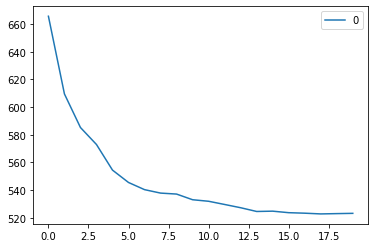

In [126]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
ax = curve.plot()
ax.figure.savefig('k_value.png')
#curve.savefig('k_value.png')


In [127]:
dict_pred = {'durée_actuelle':y_test,
             'durée_predit':pred }
df_knn = pd.DataFrame(dict_pred)
df_knn.head()
df_knn.describe()

,durée_actuelle,durée_predit
count,7086.000000,7086.000000
mean,414.454038,412.905203
std,683.169754,472.614935
min,0.233333,105.507500
25%,124.350000,220.555000
50%,224.608333,282.004167
75%,417.470833,449.670833
max,8140.783333,6193.918333


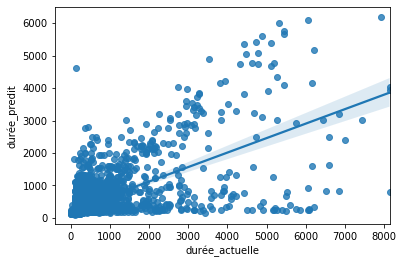

In [128]:
# prediction resul vs test data 
sns_knn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_knn)
fig = sns_knn.get_figure()
fig.savefig('knn_pred.png')

###  Implementing GridsearchCV  

In [129]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 8578 10444  3168 ...   147   441   217]
continuous
multiclass
multiclass


In [130]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,20))}

knn = neighbors.KNeighborsRegressor()

Grid_model = GridSearchCV(knn, params, cv=5,n_jobs=-1)
Grid_model.fit(x_train,y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-Grid_model.best_score_,Grid_model.best_params_))
#model.best_params_

Meilleur score = 0.525337, Meilleur paramètre = {'n_neighbors': 13}


In [350]:
pred2=Grid_model.predict(x_test)
regression_results(y_test, pred2)

explained_variance:  -1.1906
r2:  -1.6307
MAE:  656.9732
MAPE:  nan
MSE:  1137847.2506
RMSE:  1066.6992


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [347]:
# Estimation de l'erreur de prévision sur l'échantillon test
1.-Grid_model.best_score_

0.5253373259521247

In [348]:
dict_pred = {'durée_actuelle':y_test,
             'durée_predit':pred2 }
df_knn2 = pd.DataFrame(dict_pred)
df_knn2.head()

df_desc = df_knn2.describe()
df_desc['Error'] = pow(pow((df_knn2.describe().durée_actuelle - df_knn2.describe().durée_predit),2),0.5)
df_desc


,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,406.266380,4265.843718,3859.577339
std,640.202147,2595.056814,1954.854666
min,0.000000,0.000000,0.000000
25%,125.000000,1820.919231,1695.919231
50%,225.000000,4878.588462,4653.588462
75%,417.000000,6652.567949,6235.567949
max,8140.000000,7516.883333,623.116667


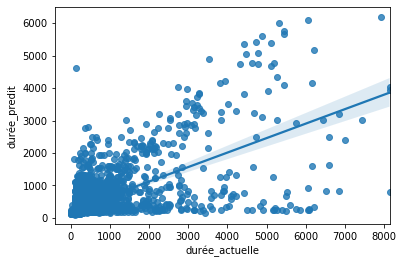

In [128]:
# prediction resul vs test data 
sns_knn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_knn2)
fig = sns_knn.get_figure()
fig.savefig('knn_pred.png')

## 2eme mehode knn avec l'ensemble des variables 

In [441]:
dataset_knn= data_test.copy()
x_knn = dataset_knn.drop(['treatment_time','treatment_day'], axis=1)

#label encoder
x_knn = x_knn.apply(preprocessing.LabelEncoder().fit_transform)
y_knn = dataset_knn['treatment_time']/np.timedelta64(1, 'h')

# split sata 
xk_train2, xk_test2, yk_train2, yk_test2 = train_test_split(x_knn, y_knn, test_size=0.2,random_state=seed1)

In [442]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,20))}

knn = neighbors.KNeighborsRegressor()

Grid_model2 = GridSearchCV(knn, params, cv=5,n_jobs=-1)
Grid_model2.fit(xk_train2,yk_train2)

print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-Grid_model2.best_score_,Grid_model2.best_params_))
#model.best_params_

Meilleur score = 0.067068, Meilleur paramètre = {'n_neighbors': 1}


In [447]:
model = neighbors.KNeighborsRegressor()
model = model.fit(xk_train2,yk_train2)

In [448]:
# show parameters result
regression_results(yk_test2,model.predict(xk_test2))

# show parameters result
regression_results(yk_test2,Grid_model2.predict(xk_test2))

C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


explained_variance:  0.9189
r2:  0.9187
MAE:  37.2646
MAPE:  nan
MSE:  34313.5741
RMSE:  185.2392
explained_variance:  0.9512
r2:  0.9512
MAE:  16.1554
MAPE:  nan
MSE:  20596.3685
RMSE:  143.5143


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [449]:
rnn_pre = Grid_model2.predict(xk_test2)

dict_pred = {'durée_actuelle':yk_test2,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt.head()


df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,410.403756,406.323114,4.080642
std,649.652012,638.889335,10.762678
min,0.000000,0.000000,0.000000
25%,125.133333,124.500000,0.633333
50%,226.166667,224.883333,1.283333
75%,421.858333,418.200000,3.658333
max,8190.616667,8190.616667,0.000000


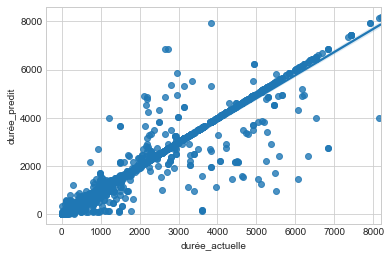

In [450]:
# prediction resul vs test data 
rnn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = rnn.get_figure()
fig.savefig('knn2_pred2.png')

----
----
---

################################################################################################################################
# ARBRE DE DECISION
################################################################################################################################

In [396]:
#data_test.columns


In [478]:
dataset_decision_tree=data_test.copy()
x_decision_tree = dataset_decision_tree.drop(['treatment_time','treatment_day','number'], axis=1)

#label encoder
x_decision_tree=x_decision_tree.apply(preprocessing.LabelEncoder().fit_transform)
y = dataset_decision_tree['treatment_time']/np.timedelta64(1, 'h')

from sklearn import tree
clf = tree.DecisionTreeRegressor()
seed1=np.random.randint(65536)
seed2=np.random.randint(65536)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_decision_tree, y, test_size=0.2,random_state=seed1)
x_train3, x_validation3, y_train3, y_validation3 = train_test_split(x_train3, y_train3, test_size=0.2,random_state=seed2)

clf = clf.fit(x_train3, y_train3)
regression_results(y_test3,clf.predict(x_test3))
#well, the DecisionTreeRegressor get a much greater result, I consider it is because the classifier can use all features
#that means can use all information

explained_variance:  0.9976
r2:  0.9976
MAE:  7.9508
MAPE:  nan
MSE:  1038.7519
RMSE:  32.2297


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [479]:
#try to optimize the min_samples_leaf parament
index_list=[]
mse_list=[]
for i in range(1,20):
    clf = tree.DecisionTreeRegressor(min_samples_leaf=i)
    clf = clf.fit(x_train3, y_train3)
    index_list.append(i)
    mse_list.append(metrics.mean_squared_error(y_test3,clf.predict(x_test3)))

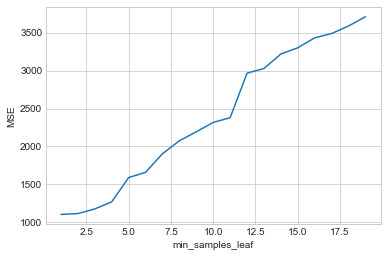

In [480]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='min_samples_leaf', ylabel='MSE')
fig.savefig('DT_sample.png')

ax.plot(index_list,mse_list);

#seems when the best performance happened in min_samples_leaf=4
leaf_=index_list[mse_list.index(min(mse_list))]

In [481]:
from sklearn import ensemble
index_list=[]
mse_list=[]
for e in range(5,20):
    #print(e)
    bag=ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(min_samples_leaf=leaf_),
                                  max_samples=0.8,n_estimators=e,
                                  n_jobs=4)
    bag = bag.fit(x_train3, y_train3)
    bag_pre=bag.predict(x_test3)
    index_list.append(e)
    mse_list.append(regression_results(y_test3,bag_pre,r="MSE"))

C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarni

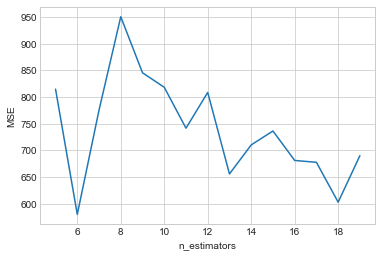

In [482]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='n_estimators', ylabel='MSE')

fig.savefig('DT_est_pred.png')
ax.plot(index_list,mse_list);

#find best n_estimators
n_estimators_=index_list[mse_list.index(min(mse_list))]

In [483]:
bag=ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(min_samples_leaf=leaf_),
                              max_samples=0.8,
                              n_estimators=n_estimators_,
                              n_jobs=4)
bag = bag.fit(x_train3, y_train3)
bag_pre=bag.predict(x_test3)
regression_results(y_test3,bag_pre)

explained_variance:  0.9978
r2:  0.9978
MAE:  9.2024
MAPE:  inf
MSE:  951.3402
RMSE:  30.8438


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


### Recherche de la meilleure profondeur 

In [141]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train3)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train3))
print(utils.multiclass.type_of_target(y_train3.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 4698  9094  7067 ...   963 10736  7557]
continuous
multiclass
multiclass


In [142]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(x_train3, training_scores_encoded)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Meilleur score = 0.989404, Meilleur paramètre = {'max_depth': 9}


#### Calcul de l'estimation sur l'echatillon de test 

In [143]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded2 = lab_enc.fit_transform(y_test3)
print(training_scores_encoded2)
print(utils.multiclass.type_of_target(y_test3))
print(utils.multiclass.type_of_target(y_test3.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded2))

[3477 5101 5393 ... 6900  481  184]
continuous
multiclass
multiclass


In [144]:
# Estimation de l'erreur de prévision
1-treeOpt.score(x_test3,training_scores_encoded2)

0.9992590763151395

In [146]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]

tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(x_train3, training_scores_encoded)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Meilleur score = 0.989393, Meilleur paramètre = {'max_depth': 9}


In [147]:
treeOpt.predict(x_test3)

array([7786,  189, 9829, ..., 7786,  188,  188], dtype=int64)

## Avec que les variables numeriques 

In [149]:
cate=10
dataset_linear_regression=data_test.copy()
catColumns = dataset_linear_regression.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()

for col in catColumns:
    n = len(dataset_linear_regression[col].unique())
    if (n > 2):
        if(n < cate):
            X = pd.get_dummies(dataset_linear_regression[col])       
            #X = X.drop(X.columns[0], axis=1)
            dataset_linear_regression[col+" - "+X.columns] = X
        dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        le.fit(dataset_linear_regression[col])
        dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])
        
x_linear_regression = dataset_linear_regression.drop(['treatment_time','treatment_day'], axis=1)

# remove datetime columns 
col_time = dataset_linear_regression.select_dtypes(['datetime64']).columns
x_linear_regression = x_linear_regression.drop(col_time, axis=1)

x_train4, x_test4, y_train4, y_test4 = train_test_split(x_linear_regression, y, test_size=0.2,random_state=seed1)
x_train4, xvalidation4, y_train4, y_validation4 = train_test_split(x_train4, y_train4, test_size=0.2,random_state=seed2)

linreg = linear_model.LinearRegression()
reg=linreg.fit(x_train4,y_train4)
regression_results(y_test4,reg.predict(x_test4))

explained_variance:  0.4984
r2:  0.4983
MAE:  211.5169
MSE:  211908.2634
RMSE:  460.3349


In [389]:
x_linear_regression.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'contact_type', 'impact', 'urgency',
       'priority', 'knowledge', 'u_priority_confirmation', 'notify'],
      dtype='object')

''

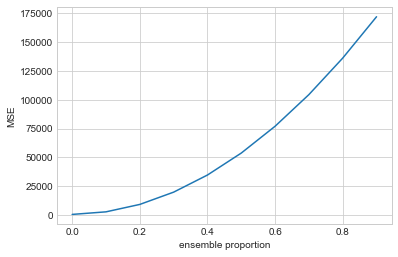

In [181]:
index_list=[]
mse_list=[]

clf_pre=clf.predict(x_test3)
reg_pre=reg.predict(x_test4)

for i in np.arange(0.0, 1.0, 0.1):
    index_list.append(i)
    mse_list.append(metrics.mean_squared_error(y_test3,reg.predict(x_test4)*i+bag.predict(x_test3)*(1-i)))
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='ensemble proportion', ylabel='MSE')
ax.plot(index_list,mse_list)

# save figure 
plt.savefig('DT_prop.png')

In [175]:
#let's do a final check whether there are overfitting
regression_results(y_test3,bag_pre)
regression_results(y_validation3,bag.predict(x_validation3))

explained_variance:  0.9984
r2:  0.9984
MAE:  8.1949
MSE:  658.5753
RMSE:  25.6627
explained_variance:  0.9981
r2:  0.9981
MAE:  8.4305
MSE:  767.8743
RMSE:  27.7105


### Tracer de la courbe de prédiction

In [473]:
val_pre = bag.predict(x_validation3)

In [276]:
dict_pred = {'durée_actuelle':y_validation3,
             'durée_predit':val_pre }
df_dt = pd.DataFrame(dict_pred)
df_dt.head()
df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,22674.000000,22674.000000,0.000000
mean,408.509863,408.412258,0.097605
std,636.768611,634.551294,2.217317
min,0.000000,0.044737,0.044737
25%,125.566667,135.032237,9.465570
50%,231.483333,227.814035,3.669298
75%,417.616667,416.961623,0.655044
max,8190.616667,8143.406140,47.210526


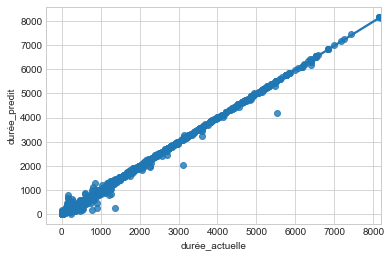

In [178]:
# prediction resul vs test data 
sns_DT = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = sns_DT.get_figure()
fig.savefig('DT_pred.png')

#  2e methode avec les 14 variables 

In [494]:
from sklearn.model_selection import train_test_split

train_dt , test_dt = train_test_split(knn_x_transform, test_size = .20)

xd_train = train_dt.drop('treatment_time', axis=1)
yd_train = train_dt['treatment_time']/np.timedelta64(1, 'h')

#transform data in class
lab_enc = preprocessing.LabelEncoder()
yd_train = lab_enc.fit_transform(yd_train)

xd_test = test_dt.drop('treatment_time', axis = 1)
yd_test = test_dt['treatment_time']/np.timedelta64(1, 'h')

In [495]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]

tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt2 = tree.fit(xd_train, yd_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt2.best_score_,treeOpt2.best_params_))

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Meilleur score = 0.991532, Meilleur paramètre = {'max_depth': 9}


In [496]:
reg_dt2 = treeOpt2.predict(xd_test)
regression_results(yd_test,reg_dt2)

explained_variance:  -17.927
r2:  -20.5927
MAE:  1380.6643
MAPE:  nan
MSE:  8999992.3377
RMSE:  2999.9987


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


## table resultat de la prediction

In [472]:
x_validation3.shape

(22674, 31)

In [474]:
dat_show = x_validation3
dat_show['treatment_time'] = dataset_decision_tree.treatment_time/np.timedelta64(1, 'h')

#dataset_decision_tree['treatment_time']/np.timedelta64(1, 'h')
dat_show["durée_predit"]= val_pre

In [475]:
dat_show.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,treatment_time,durée_predit
10917,1573,8,1,0,0,1,1,1525,165,1249,...,182,1,0,0,13,70,633,95,124.800000,124.385965
40468,5862,8,1,0,0,4,1,1769,62,4508,...,32,0,0,0,14,11,3114,176,127.533333,126.485965
110266,18868,1,1,0,0,1,1,4934,31,14813,...,32,0,0,0,14,11,12766,1335,121.183333,121.045614
76025,12276,7,1,0,0,0,1,87,31,9579,...,73,0,0,0,14,52,8305,736,149.783333,149.629825
119489,20676,7,1,0,0,0,1,4395,31,16276,...,182,0,0,0,14,167,15015,1647,243.300000,226.497368


In [477]:
dat_show.describe().round()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,treatment_time,durée_predit
count,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,...,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0,22674.0
mean,11690.0,5.0,1.0,1.0,0.0,5.0,1.0,2648.0,85.0,9161.0,...,125.0,0.0,0.0,0.0,13.0,90.0,8945.0,942.0,410.0,410.0
std,7335.0,3.0,0.0,2.0,0.0,8.0,0.0,1509.0,64.0,5815.0,...,64.0,0.0,0.0,0.0,3.0,61.0,5483.0,678.0,654.0,653.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,5058.0,1.0,1.0,0.0,0.0,1.0,1.0,1338.0,31.0,3842.0,...,73.0,0.0,0.0,0.0,13.0,38.0,4056.0,315.0,125.0,131.0
50%,11286.0,6.0,1.0,1.0,0.0,3.0,1.0,2670.0,60.0,8784.0,...,139.0,0.0,0.0,0.0,13.0,81.0,8624.0,802.0,226.0,225.0
75%,18084.0,7.0,1.0,1.0,0.0,6.0,1.0,3933.0,139.0,14190.0,...,182.0,0.0,1.0,0.0,14.0,143.0,13752.0,1495.0,417.0,416.0
max,24915.0,8.0,1.0,27.0,6.0,108.0,1.0,5243.0,206.0,19846.0,...,233.0,1.0,1.0,1.0,16.0,215.0,18502.0,2706.0,8141.0,8143.0


### Traçage de l'arbre

In [184]:
lab_enc = preprocessing.LabelEncoder()
val_scores_encoded = lab_enc.fit_transform(y_validation3)
print(val_scores_encoded)
print(utils.multiclass.type_of_target(y_validation3))
print(utils.multiclass.type_of_target(y_validation3.astype('int')))
print(utils.multiclass.type_of_target(val_scores_encoded))

[  92  129 2399 ... 1137 5613 3726]
continuous
multiclass
multiclass


[Text(230.6848252118644, 206.56799999999998, 'X[11] <= 2.5\ngini = 0.999\nsamples = 22674\nvalue = [8, 4, 1 ... 1, 4, 1]'),
 Text(176.0448622881356, 184.824, 'X[5] <= 2.5\ngini = 0.998\nsamples = 8473\nvalue = [8, 1, 0 ... 0, 4, 0]'),
 Text(120.67341101694915, 163.07999999999998, 'X[9] <= 19835.5\ngini = 0.995\nsamples = 5035\nvalue = [8, 1, 0 ... 0, 2, 0]'),
 Text(71.10953389830509, 141.336, 'X[22] <= 62.0\ngini = 0.995\nsamples = 5024\nvalue = [0, 1, 0 ... 0, 2, 0]'),
 Text(26.59957627118644, 119.592, 'X[7] <= 5236.5\ngini = 0.998\nsamples = 863\nvalue = [0, 1, 0 ... 0, 2, 0]'),
 Text(17.733050847457626, 97.848, 'X[7] <= 121.5\ngini = 0.998\nsamples = 860\nvalue = [0, 1, 0 ... 0, 2, 0]'),
 Text(8.511864406779662, 76.10399999999998, 'X[18] <= 461.0\ngini = 0.92\nsamples = 17\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(5.6745762711864405, 54.360000000000014, 'X[17] <= 20.5\ngini = 0.916\nsamples = 15\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(2.8372881355932202, 32.615999999999985, 'gini = 0.

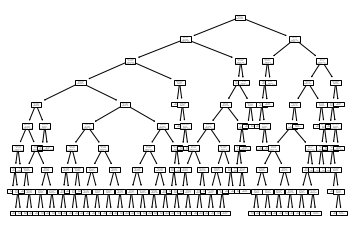

In [185]:
from sklearn.tree import plot_tree

treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG = treeG.fit(x_validation3,val_scores_encoded)
plot_tree(treeG)

In [187]:
type(treeG)

sklearn.tree._classes.DecisionTreeClassifier

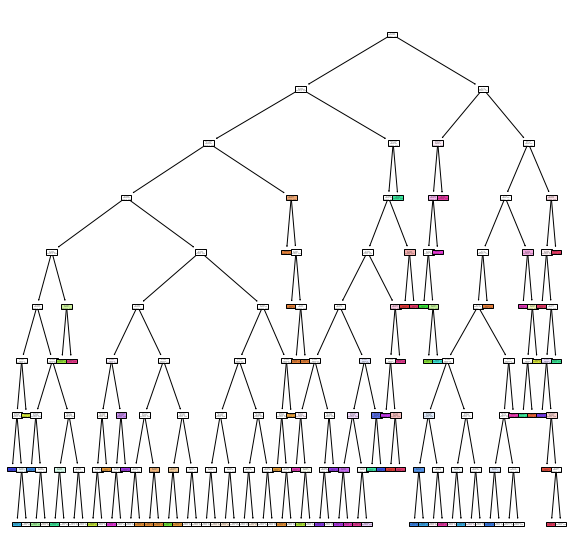

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(treeG,filled=True)
plt.show()

## 2eme methode : arbre de decision 

In [409]:
dataset_decision_tree= data_test.copy()
x_decision_tree = dataset_decision_tree.drop(['treatment_time','treatment_day'], axis=1)

#label encoder
x_decision_tree=x_decision_tree.apply(preprocessing.LabelEncoder().fit_transform)
y = dataset_decision_tree['treatment_time']/np.timedelta64(1, 'h')

# split sata 
xd_train, xd_test, yd_train, yd_test = train_test_split(x_decision_tree, y, test_size=0.2,random_state=seed1)

In [410]:
# apprentissage 
reg_dt = tree.DecisionTreeRegressor()
reg_dt = reg_dt.fit(xd_train,yd_train)

In [411]:
regression_results(yd_test,reg_dt.predict(xd_test))

explained_variance:  0.9974
r2:  0.9974
MAE:  7.2693
MAPE:  nan
MSE:  1118.0042
RMSE:  33.4366


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [458]:
val_pre = reg_dt.predict(xd_test)

In [459]:
dict_pred = {'durée_actuelle':yd_test,
             'durée_predit':val_pre }
df_dt = pd.DataFrame(dict_pred)
df_dt.head()
df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,410.403756,410.171124,0.232632
std,649.652012,649.098018,0.553994
min,0.000000,0.000000,0.000000
25%,125.133333,125.133333,0.000000
50%,226.166667,225.783333,0.383333
75%,421.858333,420.075000,1.783333
max,8190.616667,8190.616667,0.000000


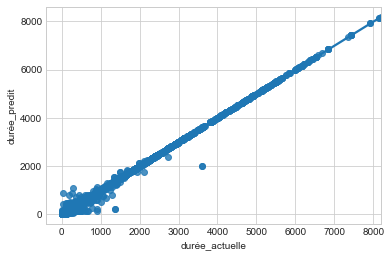

In [460]:
# prediction resul vs test data 
sns_DT = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = sns_DT.get_figure()
fig.savefig('DT_pred2.png')

---
---
---

# Reseau de neurones

In [359]:
# ann dataset 
data_Ann = knn_x_transform

In [360]:
from sklearn.model_selection import train_test_split
ann_train , ann_test = train_test_split(data_Ann, test_size = 0.05)

xa_train = ann_train.drop('treatment_time', axis=1)
ya_train = ann_train['treatment_time']/np.timedelta64(1, 'h')

xa_test = ann_test.drop('treatment_time', axis = 1)
ya_test = ann_test['treatment_time']/np.timedelta64(1, 'h')

### Convertir en classes

In [361]:
# convert to class 
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPRegressor

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(ya_train)
test_scores_encoded = lab_enc.fit_transform(ya_test)

In [362]:
# apprentissage 
from sklearn.neural_network import MLPRegressor


reg_ann = MLPRegressor(random_state=1, max_iter=500).fit(xa_train, ya_train)
#regr.predict(x_test)

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [363]:
reg_ann.predict(xa_test)

array([278.82342959, 339.72258447, 496.09291413, ..., 380.02032734,
       105.61896698, 382.02738656])

In [364]:
reg_ann.score(xa_test, ya_test)

0.47165292320627744

In [365]:
param_grid=[{"hidden_layer_sizes":list([(5,),(10,),(15,),(20,),(50,)])}]

nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt= nnet.fit(xa_train, training_scores_encoded)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.488533, Meilleur paramètre = {'hidden_layer_sizes': (50,)}


C:\Users\fouob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [374]:
# show parameters result
regression_results(test_scores_encoded,nnetOpt.predict(xa_test))

explained_variance:  -0.7201
r2:  -3.9009
MAE:  2506.6152
MAPE:  inf
MSE:  9123473.9116
RMSE:  3020.5089


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [375]:
rnn_pre = nnetOpt.predict(xa_test)

dict_pred = {'durée_actuelle':test_scores_encoded,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt.head()


df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,7086.000000,7086.000000,0.000000
mean,1718.474174,4151.877396,2433.403222
std,1364.493191,2512.344975,1147.851784
min,0.000000,-227.739027,227.739027
25%,313.250000,2637.865662,2324.615662
50%,1596.500000,3735.738700,2139.238700
75%,2918.000000,5989.443185,3071.443185
max,4275.000000,12833.674268,8558.674268


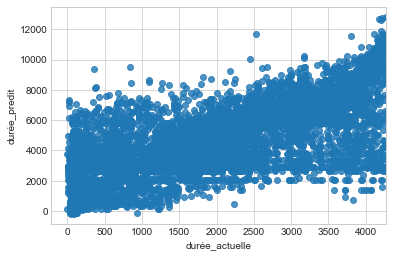

In [376]:
# prediction resul vs test data 
ann = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = ann.get_figure()
fig.savefig('Rnn_pred.png')

### Sans bossting 

In [369]:
# show parameters result
regression_results(ya_test,reg_ann.predict(xa_test))

explained_variance:  0.4811
r2:  0.4806
MAE:  198.5793
MAPE:  112.6404
MSE:  210277.5209
RMSE:  458.5603


In [418]:
rnn_pre = reg_ann.predict(xa_test)

dict_pred = {'durée_actuelle':ya_test,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt['Error'] = df_dt.durée_predit - df_dt.durée_actuelle 
df_dt.head()
df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,7086.000000,7086.000000,0.000000
mean,406.185015,419.577498,13.392483
std,636.342172,422.544095,213.798076
min,0.116667,26.291872,26.175206
25%,125.437500,278.823430,153.385930
50%,233.808333,335.783318,101.974985
75%,417.416667,462.881661,45.464994
max,8140.783333,7092.993589,1047.789745


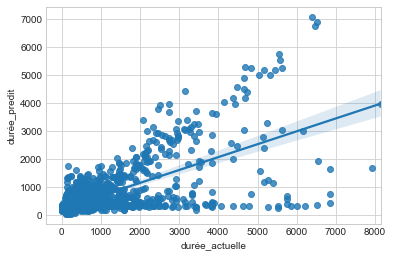

In [419]:
# prediction resul vs test data 
rnn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = rnn.get_figure()
fig.savefig('Rnn_pred.png')

In [228]:
#nnetOpt.cv_results_

## 2eme mehode ann avec l'ensemble des variables 

In [412]:
dataset_ann= data_test.copy()
x_ann = dataset_ann.drop(['treatment_time','treatment_day'], axis=1)

#label encoder
x_ann = x_ann.apply(preprocessing.LabelEncoder().fit_transform)
y_ann = dataset_ann['treatment_time']/np.timedelta64(1, 'h')

# split sata 
xa_train2, xa_test2, ya_train2, ya_test2 = train_test_split(x_ann, y_ann, test_size=0.2,random_state=seed1)

In [413]:
param_grid=[{"hidden_layer_sizes":list([(5,),(10,),(15,),(20,),(50,)])}]

nnet2 = GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt2 = nnet2.fit(xa_train2, ya_train2)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt2.best_score_,nnetOpt2.best_params_))

Meilleur score = 0.051207, Meilleur paramètre = {'hidden_layer_sizes': (50,)}


In [414]:
# show parameters result
regression_results(ya_test2,nnetOpt2.predict(xa_test2))

explained_variance:  0.9494
r2:  0.9494
MAE:  56.8749
MAPE:  inf
MSE:  21349.9687
RMSE:  146.1163


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [415]:
rnn_pre = nnetOpt2.predict(xa_test2)

dict_pred = {'durée_actuelle':ya_test2,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt.head()


df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,410.403756,411.088981,0.685225
std,649.652012,606.527684,43.124328
min,0.000000,-241.347610,241.347610
25%,125.133333,147.133695,22.000362
50%,226.166667,236.782426,10.615759
75%,421.858333,421.574915,0.283419
max,8190.616667,8403.795442,213.178775


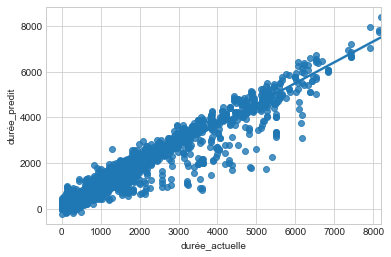

In [417]:
# prediction resul vs test data 
rnn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = rnn.get_figure()
fig.savefig('Rnn_pred2.png')

# SVM REGRESSION

In [379]:
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')

In [420]:
# ann dataset 
data_svm = knn_x_transform

In [421]:
from sklearn.model_selection import train_test_split
ann_train , ann_test = train_test_split(data_svm, test_size = 0.05)

xs_train = ann_train.drop('treatment_time', axis=1)
ys_train = ann_train['treatment_time']/np.timedelta64(1, 'h')

xs_test = ann_test.drop('treatment_time', axis = 1)
ys_test = ann_test['treatment_time']/np.timedelta64(1, 'h')

### Convertir en classes

In [422]:
# convert to class 
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPRegressor

lab_enc = preprocessing.LabelEncoder()
training_scores_encodeds = lab_enc.fit_transform(ys_train)
test_scores_encodeds = lab_enc.fit_transform(ys_test)

In [423]:
#%time
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg_svr = make_pipeline(StandardScaler(),LinearSVR(random_state=0, tol=1e-5))

#svm_reg = LinearSVR(epsilon=1.5)
reg_svr.fit(xs_train, ys_train)

print(regr.predict(xs_test))


[223.74881417 127.44559093  67.28445798 ... 139.8100289  129.74259685
  16.68616285]


In [424]:
# show parameters result
regression_results(y_test,reg_svr.predict(x_test))

explained_variance:  0.3862
r2:  0.3646
MAE:  194.6334
MAPE:  inf
MSE:  274804.8616
RMSE:  524.2183


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [425]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(xs_train)  
Xr_train = scaler.transform(xs_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(xs_test)

In [426]:
from sklearn.svm import SVR,LinearSVR

#%time
#parameters = [{'kernel': ['linear'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
param=[{"C":[1, 10, 100, 1000, 10000]}]
svr_lin= GridSearchCV(LinearSVR(epsilon=1.5),param,cv=10)


svmOpt=svr_lin.fit(Xr_train, ys_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Meilleur score = 0.617052, Meilleur paramètre = {'C': 100}


C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [427]:
# avec les meilleurs paramètes
#svr_lin = SVR(kernel='linear', C=1000, gamma='auto')
#svr_lin_best = svr_lin.fit(Xr_train, ys_train)


In [428]:
# erreur de prévision sur le test
#1-svmOpt.score(x_test,y_test)

In [429]:
# show parameters result
regression_results(ys_test,svr_lin_best.predict(Xr_test))

# show parameters result
regression_results(ys_test,svmOpt.predict(Xr_test))

explained_variance:  -55.1595
r2:  -55.5044
MAE:  2824.3104
MAPE:  1427.0053
MSE:  24149320.7817
RMSE:  4914.1958
explained_variance:  0.3863
r2:  0.3657
MAE:  193.5587
MAPE:  70.4259
MSE:  271110.9045
RMSE:  520.6831


In [430]:
#pow(pow((df_dt.describe().durée_predit - df_dt.describe().durée_actuelle),2),0.5)

In [431]:
y_chap = svmOpt.predict(Xr_test)

dict_pred = {'durée_actuelle':ys_test,
             'durée_predit':y_chap }

df_dt = pd.DataFrame(dict_pred)
df_dt.head()
df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc
#df_dt.describe()

,durée_actuelle,durée_predit,Error
count,7086.000000,7086.000000,0.000000
mean,405.149889,311.329202,93.820687
std,653.795602,323.888283,329.907319
min,0.233333,-18.772534,19.005867
25%,124.725000,151.553340,26.828340
50%,221.275000,213.026422,8.248578
75%,415.150000,363.845931,51.304069
max,8140.783333,5072.590896,3068.192437


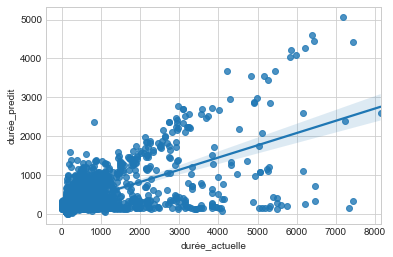

In [432]:
# prediction resul vs test data 
sns_svm = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = sns_svm.get_figure()
fig.savefig('svm_pred.png')

### 2eme méthode : SVR avec l'ensemble des variable  

In [433]:
dataset_svr= data_test.copy()
x_svr = dataset_svr.drop(['treatment_time','treatment_day'], axis=1)

#label encoder
x_svr = x_svr.apply(preprocessing.LabelEncoder().fit_transform)
y_svr = dataset_svr['treatment_time']/np.timedelta64(1, 'h')

# split sata 
xs_train2, xs_test2, ys_train2, ys_test2 = train_test_split(x_svr, y_svr, test_size=0.2,random_state=seed1)

In [435]:
param=[{"C":[1, 10, 100, 1000, 10000]}]
svr_lin= GridSearchCV(LinearSVR(epsilon=1.5),param,cv=10)

svmOpt2 = svr_lin.fit(xs_train2, ys_train2)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt2.best_score_,svmOpt2.best_params_))

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Meilleur score = 0.339119, Meilleur paramètre = {'C': 10}


C:\Users\fouob\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [438]:
# show parameters result
regression_results(ys_test2,svmOpt2.predict(xs_test2))

explained_variance:  0.6882
r2:  0.594
MAE:  284.0716
MAPE:  inf
MSE:  171354.147
RMSE:  413.9494


C:\Users\fouob\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [439]:
rnn_pre = svmOpt2.predict(xs_test2)

dict_pred = {'durée_actuelle':ys_test2,
             'durée_predit':rnn_pre }
df_dt = pd.DataFrame(dict_pred)
#df_dt.head()


df_desc = df_dt.describe()
df_desc['Error'] = pow(pow((df_dt.describe().durée_actuelle - df_dt.describe().durée_predit),2),0.5)
df_desc

,durée_actuelle,durée_predit,Error
count,28343.000000,28343.000000,0.000000
mean,410.403756,609.789280,199.385524
std,649.652012,503.203875,146.448138
min,0.000000,-6.120766,6.120766
25%,125.133333,334.393257,209.259924
50%,226.166667,471.760625,245.593958
75%,421.858333,659.382874,237.524541
max,8190.616667,4690.801829,3499.814838


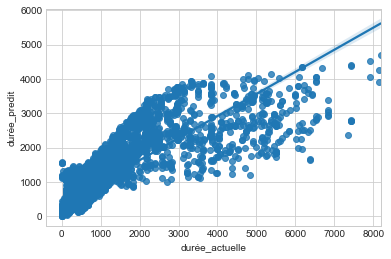

In [440]:
# prediction resul vs test data 
rnn = sns.regplot(x="durée_actuelle", y="durée_predit", data=df_dt)
fig = rnn.get_figure()
fig.savefig('svm_pred2.png')